# Exercise 6B - Discrete and Continuous Variable Sampling

The purpose of this exercise is to refresh your understanding of sampling of discrete and continuous variables and to learn how to generate sets of multi-variable EnergyPlus simulations using the simulation parameters json files.

### Colour codes

<span style="color:orange;"> Orange text is for emphasis and definitions </span>

<span style="color:lime;"> Green text is for tasks to be completed by the student </span>

<span style="color:dodgerblue;"> Blue text is for Python coding tricks and references </span>

## Load all the necessary Python packages
All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt

In [40]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.stats import skewnorm

from src.sampling import randomSampling

## 1. Discrete Variables

Discrete variables can take only a select range of values and can be numeric, categorical, or boolean.
In Python we can represent a set of discrete variables in a <span style="color:orange;">list, tuple, or set.</span>


In [41]:
integers = [1, 3, 5, 10, 100]
floats = (1.4142, 1.6180, 2.7182, 3.1419, 6.2831)
categoricals = ["red", "blue", "orange"]
booleans = {True, False}


<span style="color:limegreen;">Do you know the difference between these three?</span>

### 1.1 Sampling
We can sample from each of these using Python's built-in random functions or Numpy's random functions.

Say we want to take 1000 random samples from each of the integers set above. We can do this using Numpy's *random.choice()* function:

In [42]:
n_samples = 1000

A = np.random.choice(integers, n_samples)
values, counts = np.unique(A, return_counts=True)

for i in range(len(values)):
    print (f"{values[i]} : {counts[i]}")

1 : 212
3 : 179
5 : 188
10 : 198
100 : 223


As you can see the values are more-or-less evenly distributed.

### 1.2 Weighted Sampling

What if we had *a priori* knowledge that one discrete value such as the <span style = "color:orange;"> colour orange</span> was more common or popular among a population? We can account for this by giving *weights* or *probabilities* to the function:

In [43]:
probabilities = [0.1, 0.3, 0.6]

A = np.random.choice(categoricals, n_samples, p = probabilities)
values, counts = np.unique(A, return_counts=True)

for i in range(len(values)):
    print (f"{values[i]} : {counts[i]}")

blue : 297
orange : 595
red : 108


As you can see <span style = "color:orange;"> orange</span> is the most popular colour (as it should be!) and that the final counts reflect the probabilities given.

## 2. Continuous Variables

Similar to discrete variables, we can sample from continuous variables (int, floats) but there are more options as to how this is accomplished. We can sample from a large number of distributions including:
* Uniform distributions
* Normal/Gaussian distributions
* Skewed distributions
* Binomial distributions
* Many others.

Certain distributions may be more appropriate for certain problems than others.

### 2.1 Uniform Distribution
To start we will use a uniform distribution with 100 samples.

In [44]:
n_samples = 100

# Choose the range of values we want to sample from
min_value = -3
max_value = 3

# Generate samples from a uniform distribution
uniform_values = np.random.uniform(min_value, max_value, n_samples)

print ("The first 10 uniformly distributed samples are:")
print (uniform_values[:10])


The first 10 uniformly distributed samples are:
[-1.47054007  0.18949832 -2.62860292 -1.17148324  2.74605574  1.12486203
 -1.97084002  0.29896741 -1.75891497 -0.65952224]


Let's create a histogram to see if the uniform didtribution has been properly recreated.

Bins and counts
-3.0 to -2.5 : 15
-2.5 to -2.0 : 15
-2.0 to -1.5 : 6
-1.5 to -1.0 : 16
-1.0 to -0.5 : 10
-0.5 to 0.0 : 3
0.0 to 0.5 : 4
0.5 to 1.0 : 7
1.0 to 1.5 : 7
1.5 to 2.0 : 4
2.0 to 2.5 : 6
2.5 to 3.0 : 7


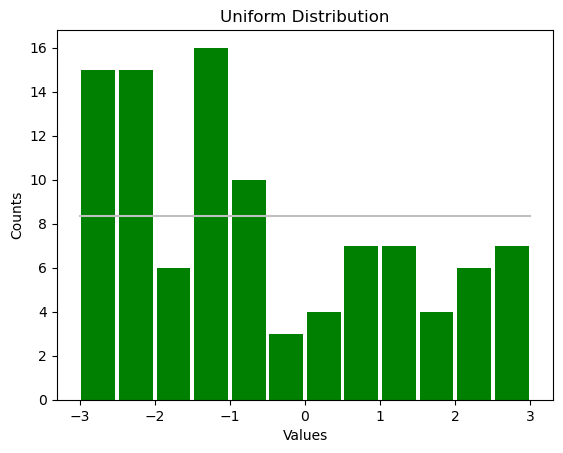

In [45]:
# Use Numpy's histogram function to count how many items are in each bin
# The functions allows us to control the number of bins and the range of those bins
n_bins = 12
counts, bins = np.histogram(uniform_values, bins = n_bins, range = [min_value, max_value])

print ("Bins and counts")
for i in range(len(counts)):
    print (f"{bins[i]} to {bins[i+1]} : {counts[i]}")

# Plot the resulting histogram 
fig, ax = plt.subplots()
ax.hist(bins[:-1], bins, weights = counts, rwidth = 0.9, color = "green")

# Plot the theoretical line
x = [min_value, max_value]
y = [n_samples / n_bins, n_samples / n_bins]

ax.plot(x, y, color = "silver")

ax.set_title("Uniform Distribution")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")
plt.show()

As you can see, the distribution approaches the theroretical uniform distribution line in silver. Note that your graph may differ because we haven't selected a random seed.

<span style="color:lime;"> What simple adjustment can you do to make the results more closely match the theoretical uniform distribution line? </span>

### 2.2 Gaussian Distributions

Repeat the above process for a gaussian distribution. Here we will assume a mean ($\mu$) of 0 and standard deviation ($\sigma$) of 1. We will also increase the number of samples from 100 to 1000

In [46]:
n_samples = 1000

# Choose the mean and standard deviation (sigma) that we want to sample
mu = 0
sigma = 1

# Generate samples from a uniform distribution
gaussian_values = np.random.normal(mu, sigma, n_samples)

print ("The first 10 normally distributed samples are:")
print (gaussian_values[:10])


The first 10 normally distributed samples are:
[-0.68886807  0.95276842  0.11140393 -1.41773061  0.58765637  0.13467046
 -0.29233386  0.40554652  0.17452224 -0.38244501]


Plotting the histogram

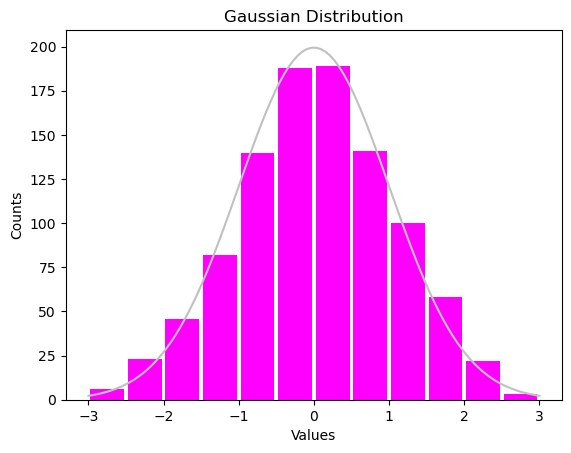

In [47]:
# Use Numpy's histogram function to count how many items are in each bin
# The functions allows us to control the number of bins and the range of those bins
n_bins = 12
counts, bins = np.histogram(gaussian_values, bins = 12, range = [min_value, max_value])

# Plot the resulting histogram 
fig, ax = plt.subplots()
ax.hist(bins[:-1], bins, weights = counts, rwidth = 0.9, color = "magenta")

# Plot the gaussian distribution line
x = np.linspace(-3, 3, 100)
bin_width = bins[1] - bins[0]
y = 1.0 / (np.sqrt(2.0 * np.pi) * sigma) * np.exp(-np.power((x - mu) / sigma, 2.0) / 2) 
# To scale the gaussian distribution line properly
y *= n_samples * bin_width
ax.plot(x, y, color= "silver")

ax.set_title("Gaussian Distribution")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")
plt.show()

Once again, the resulting histogram should approach the shape of the theoretical Gaussian distribution curve.

## 2.3 Skewed Distributions

You are also able to sample from skewed distributions. Here we will use the same mean and standard deviation, but introduce a skew ($\gamma$) of -3.

In [48]:
# Choose the mean and standard deviation (sigma) that we want to sample
mu = 0
sigma = 1
skew = -3

# Generate samples from a skewed distribution.
# For this we need scipy's skewnorm function which uses some different terminology
# loc = 
skewed_values = skewnorm.rvs(skew, loc = 1, scale = sigma, size = n_samples)


print ("The first 10 skewed distributed samples are:")
print (gaussian_values[:10])


The first 10 skewed distributed samples are:
[-0.68886807  0.95276842  0.11140393 -1.41773061  0.58765637  0.13467046
 -0.29233386  0.40554652  0.17452224 -0.38244501]


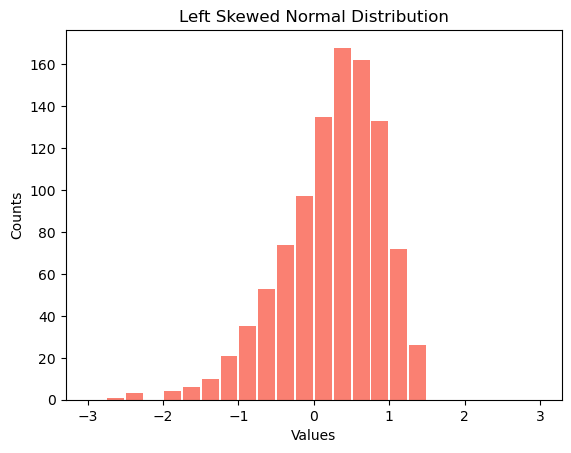

In [49]:
# Use Numpy's histogram function to count how many items are in each bin
# The functions allows us to control the number of bins and the range of those bins
n_bins = 24
counts, bins = np.histogram(skewed_values, bins = n_bins, range = [min_value, max_value])

# Plot the resulting histogram 
fig, ax = plt.subplots()
ax.hist(bins[:-1], bins, weights = counts, rwidth = 0.9, color = "salmon")


ax.set_title("Left Skewed Normal Distribution")
ax.set_xlabel("Values")
ax.set_ylabel("Counts")
plt.show()

The majority of data points are clustered to the right with an elongated tail toward the left.

Sorry. No silver theoretical line, as there isn't a straightforward way of doing this for a skewed distribution.

## 3. Multi-variable Sampling of EnergyPlus parameters
In this section, it will be shown how to generate random samples of EnergyPlus parameters and then run them in a batch simulation.


### 3.1 General Parameters

<span style="color:limegreen;"> This cell contains editable options for running EnergyPlus in this course. </span>

In [50]:
# Enter a save name for this run
saveName = "Exercise_6B"

# Enter the path to the directory with your EnergyPlus executable. Enter the full path separated by commas.
#NOTE: Need to use Pathlib:Path to enter the absolute path to avoid issues cross-platform compatibility issues.
#NOTE: Enter each sub-directory as a tuple separated by commas. Note special characters required for drive letters

ep_dir = Path("c:\\", "EnergyPlusV25-1-0") # Example For Windows

# The weather file to be used for this batch of simulations. This file should be located in the src/weatherData/ directory.
weatherFile = "GBR_ENG_London.Wea.Ctr-St.James.Park.037700_TMYx.2009-2023.epw"

# The baseline file to be used for this simulation. This file should be located in the idfs/ directory
idf_file = "1-storey_Example6A.idf"

# The parameters file to be used as part of this simulation
parameters_file = "Exercise 6B.json"

# The maximum number of simulations to be run
n_simulations = 100

### 3.2 Simulation Parameters Files
Parameter files are the instructions on how each model will change upon each iteration. These instructions are located in the *simulationParameters/* directory.

The files are in JSON format. JSON files are similar in nature (but not the same) as Python's dictionary and list types.

Putting the instructions in separate files allows us to quickly change and modify the simulation parameters for all the exercises throughout the course.

The below code opens the json file and places into a Python dictionary.

In [52]:
parameters_file = "Exercise 6B.json"

parameters_file_path = Path("simulationParameters", parameters_file)

if not parameters_file_path.exists():
    raise Exception (f"Could not find the parameters_file at {parameters_file_path}.")

with open (parameters_file_path) as f:
    parameters = json.load(f)

In this example we have 14 simulation parameters which are being modified. They are:

In [53]:
print (f"Name                      TYPE        VALUES")
for k,v in parameters.items():
    print (f"{k:<26}{v['type']:<12}{v['values']}")

Name                      TYPE        VALUES
coolingSetpoint           constant    [99]
length                    constant    [10]
width                     int         [5, 10]
height                    float       [3, 4]
u_windows                 float       [0.65]
g_value                   float       [0.22]
wwr                       constant    [0.5]
ach_50                    constant    [6]
ventilationRate           constant    [0.02]
slabInsulationThickness   categorical [0.0001, 0.025, 0.05, 0.075, 0.1]
wallInsulationThickness   categorical [0.0001, 0.025, 0.05, 0.075, 0.1]
roofInsulationThickness   categorical [0.0001, 0.025, 0.05, 0.075, 0.1]
fixedShadingDepth         constant    [0.5]
roofAbsorptance           constant    [0.7]


There are four types of variables that can be chosen:
* **constant**: A single value that we want fixed for the run
* **float**: This a two value list of values denoting the minimum and maximum range of values to be sampled from. The values sampled will be floats (decimals)
* **int**: This a two value list of values denoting the minimum and maximum range of values to be sampled from. The values sampled will be always be integers, even if floats are given in the list.
* **categorical**: This is a list of any length denoting a limited number of values from which to be sampled from

In the above example the building has a constant length of 10m, a width of between 5 and 10m (integer values only), a height between 3 and 4m (decimal values), and categorical values for insulation in 25 mm (1 inch) increments. <span style="color:orange">NOTE: that in EnergyPlus, we can not give an insulation thickness of zero. Instead we give a very small value so as to have minimal impacts on the simulation. </span>

Refer to the simulationParameters.md file for an explanation of what each parameter means and their units.

### 3.3 Generating Random Samples

Lets generate a list of iterations using a random sampling method for each variable. This is done using the randomSampling function. See the function in *src/sampling* to understand how it works. Note that we will use other sampling methods over the next few weeks.

In [54]:
# Create a list of combinations of parameters stored in a dataframe format
combinations = randomSampling(parameters, n_simulations)
print (combinations)

# Save the combinations as a csv
savePath = Path("outputs", "combinations", f"combinations_{saveName}.csv")
combinations.to_csv(savePath)
print (f"Combinations dataframe saved to {savePath}.")

    coolingSetpoint  length  width    height  u_windows  g_value  wwr  ach_50  \
0              99.0    10.0    9.0  3.719517       0.65     0.22  0.5     6.0   
1              99.0    10.0    9.0  3.052428       0.65     0.22  0.5     6.0   
2              99.0    10.0    6.0  3.279251       0.65     0.22  0.5     6.0   
3              99.0    10.0    7.0  3.369431       0.65     0.22  0.5     6.0   
4              99.0    10.0    8.0  3.172646       0.65     0.22  0.5     6.0   
..              ...     ...    ...       ...        ...      ...  ...     ...   
95             99.0    10.0    6.0  3.691540       0.65     0.22  0.5     6.0   
96             99.0    10.0    5.0  3.735731       0.65     0.22  0.5     6.0   
97             99.0    10.0    8.0  3.328756       0.65     0.22  0.5     6.0   
98             99.0    10.0    9.0  3.444849       0.65     0.22  0.5     6.0   
99             99.0    10.0    8.0  3.046037       0.65     0.22  0.5     6.0   

    ventilationRate  slabIn

<span style="color:lime">Confirm that each variable has been sampled as expected.</span>

### 3.4 Manual Edits

The simulation parameter json files will need to edited to complete the coursework. These can easily be done by using a text editor or VS Code.

<span style="color:lime">Open the file *simulationParameters/Exercise 6B.json* and change the parameters u-windows and g-value from constant to float types with value ranges that you feel are appropriate for each parameter</span>

<span style="color:lime">Rename the file *Exercise 6B_Manual Edits.json*</span>


Reload the simulation parameters json file and generate and new set of random samples.

In [55]:
parameters_file = "Exercise 6B_ManualEdits.json"

parameters_file_path = Path("simulationParameters", parameters_file)

if not parameters_file_path.exists():
    raise Exception (f"Could not find the parameters_file at {parameters_file_path}.")

with open (parameters_file_path) as f:
    parameters = json.load(f)

# Create a list of combinations of parameters stored in a dataframe format
combinations = randomSampling(parameters, n_simulations)
print (combinations)

# Save the combinations as a csv
savePath = Path("outputs", "combinations", f"combinations_{saveName}.csv")
combinations.to_csv(savePath)
print (f"Combinations dataframe saved to {savePath}.")

    coolingSetpoint  length  width    height  u_windows  g_value  wwr  ach_50  \
0              99.0    10.0    7.0  3.697590        7.0      5.0  0.5     6.0   
1              99.0    10.0    8.0  3.961888        7.0      5.0  0.5     6.0   
2              99.0    10.0    7.0  3.222988        7.0      5.0  0.5     6.0   
3              99.0    10.0    6.0  3.703872        7.0      5.0  0.5     6.0   
4              99.0    10.0    5.0  3.995448        7.0      5.0  0.5     6.0   
..              ...     ...    ...       ...        ...      ...  ...     ...   
95             99.0    10.0    5.0  3.117232        7.0      5.0  0.5     6.0   
96             99.0    10.0    8.0  3.776406        7.0      5.0  0.5     6.0   
97             99.0    10.0    8.0  3.745527        7.0      5.0  0.5     6.0   
98             99.0    10.0    8.0  3.871339        7.0      5.0  0.5     6.0   
99             99.0    10.0    7.0  3.109916        7.0      5.0  0.5     6.0   

    ventilationRate  slabIn

### 3.5 Running the Simulations

<span style="color:lime;">Now that you have set-up combinations of EnergyPlus simulations, complete the necessary code to run the simulations and save the results.</span>

In [59]:
import matplotlib.pyplot as plt
from multiprocessing import Pool
import os
import pandas as pd
from pathlib import Path
import time
from src.runEnergyPlus import run_energyPlus
from src.runEnergyPlus6A import run_energyPlus_6A


In [62]:
# Enter a save name for this run
saveName = "Exercise_6B simulations"

# Enter the path to the directory with your EnergyPlus executable. Enter the full path separated by commas.
#NOTE: Need to use Pathlib:Path to enter the absolute path to avoid issues cross-platform compatibility issues.
#NOTE: Enter each sub-directory as a tuple separated by commas. Note special characters required for drive letters

from pathlib import Path

ep_dir = Path("/Users", "rf", "Documents", "EnergyPlus-25-1-0")

# The weather file to be used for this batch of simulations. This file should be located in the src/weatherData/ directory.
weatherFile = "GBR_ENG_London.Wea.Ctr-St.James.Park.037700_TMYx.2009-2023.epw"

# The baseline file to be used for this simulation. This file should be located in the idfs/ directory
idf_file = "1-storey_baseline.idf"

# The parameters file to be used as part of this simulation
parameters_file = None

# The maximum number of simulations to be run
n_simulations = None

In [63]:
idf_path = Path("idfs", idf_file)
weather_file_path = Path("weatherData", weatherFile)

if not ep_dir.exists():
    raise Exception (f"Could not find energyPlus executable at {ep_dir}.")
if not idf_path.exists():
    raise Exception (f"Could not find idf_file at {idf_path}.")
if not weather_file_path.exists():
    raise Exception (f"Could not find weather_file at {weather_file_path}.")

print (f"The EnergyPlus directory is: {ep_dir}.")
print (f"The baseline idf file is: {idf_path}.")
print (f"The weather file is: {weather_file_path}.")

The EnergyPlus directory is: /Users/rf/Documents/EnergyPlus-25-1-0.
The baseline idf file is: idfs/1-storey_baseline.idf.
The weather file is: weatherData/GBR_ENG_London.Wea.Ctr-St.James.Park.037700_TMYx.2009-2023.epw.


In [65]:
filePath = Path("outputs", "combinations", "combinations_Exercise_6B.csv")

combinations = pd.read_csv(filePath, index_col = 0)

print ("The first ten rows of the combinations database look like this.")
print (combinations.head(10))

The first ten rows of the combinations database look like this.
   coolingSetpoint  length  width    height  u_windows  g_value  wwr  ach_50  \
0             99.0    10.0    7.0  3.697590        7.0      5.0  0.5     6.0   
1             99.0    10.0    8.0  3.961888        7.0      5.0  0.5     6.0   
2             99.0    10.0    7.0  3.222988        7.0      5.0  0.5     6.0   
3             99.0    10.0    6.0  3.703872        7.0      5.0  0.5     6.0   
4             99.0    10.0    5.0  3.995448        7.0      5.0  0.5     6.0   
5             99.0    10.0    9.0  3.346878        7.0      5.0  0.5     6.0   
6             99.0    10.0    9.0  3.816227        7.0      5.0  0.5     6.0   
7             99.0    10.0    6.0  3.348354        7.0      5.0  0.5     6.0   
8             99.0    10.0    7.0  3.645397        7.0      5.0  0.5     6.0   
9             99.0    10.0    9.0  3.292827        7.0      5.0  0.5     6.0   

   ventilationRate  slabInsulationThickness  wallInsula

In [66]:
# First convert the combinations dataframe into a list of dictionaries for each row of the dataframe. Example:
"""
[ 
    {'length': 10.0, 'width': 5.0, 'height': 3.152719, 'u_windows': 2.0},
    {'length': 10.0, 'width': 9.0, 'height': 3.664094, 'u_windows': 3.0},
    {'length': 10.0, 'width': 7.0, 'height': 3.393122, 'u_windows': 1.0},
]
"""
inputs = combinations.to_dict("records")


In [67]:
n_simulations = len(inputs)

"""
[ 
    (ep_dir, idf_path, weather_path, {'length': 10.0, 'width': 5.0, 'height': 3.152719, 'u_windows': 2.0}, 0),
    (ep_dir, idf_path, weather_path, {'length': 10.0, 'width': 9.0, 'height': 3.664094, 'u_windows': 3.0}, 1),
    (ep_dir, idf_path, weather_path, {'length': 10.0, 'width': 7.0, 'height': 3.393122, 'u_windows': 1.0}, 2),
]
"""

inputs = [(ep_dir, idf_path, weather_file_path, inputs[i], i) for i in range(n_simulations)]

In [68]:
# Set up multiprocessing by first obtaining the number of processors on your machine.
n_processors = os.cpu_count()

print (f"Preparing to run {len(inputs)} EnergyPlus simulation in parallel using {n_processors} processors.")

# Set-up the multiprocessing code block with timers
t0 = time.time()
if __name__ == "__main__":
    with Pool(processes = n_processors) as pool:
        returnValues = pool.starmap(run_energyPlus, inputs)
t1 = time.time()
print (f"\nFinished running all {n_simulations} simulations")


# Un pack the results from the batch simulation
returnCodes = [i[0] for i in returnValues]
hourlyResults = [i[1] for i in returnValues]
resilienceResults = [i[2] for i in returnValues]


# Check if any simulations had errors
errors = [x.args for x in returnCodes if x.returncode == 1]
if len(errors) > 0:
    print (f"The following {len(errors)} simulations had errors:")
    for error in errors:
        print (f"\t{error}")
else:
    print (f"All simulations completed successfully in {t1 - t0:.4f} s.")



Preparing to run 100 EnergyPlus simulation in parallel using 10 processors.
Beginning EnergyPlus simulation of iteration 0.
Beginning EnergyPlus simulation of iteration 9.
Beginning EnergyPlus simulation of iteration 3.
Beginning EnergyPlus simulation of iteration 6.
Beginning EnergyPlus simulation of iteration 21.
Beginning EnergyPlus simulation of iteration 27.
Beginning EnergyPlus simulation of iteration 15.
Beginning EnergyPlus simulation of iteration 12.
Beginning EnergyPlus simulation of iteration 18.
Beginning EnergyPlus simulation of iteration 24.
Finished EnergyPlus simulation of iteration 6. Time of simulation = 6.7353 s.
Finished EnergyPlus simulation of iteration 9. Time of simulation = 6.8498 s.
Beginning EnergyPlus simulation of iteration 7.
Beginning EnergyPlus simulation of iteration 10.
Finished EnergyPlus simulation of iteration 0. Time of simulation = 6.9429 s.
Finished EnergyPlus simulation of iteration 3. Time of simulation = 6.8889 s.
Beginning EnergyPlus simulati

## 4 Summary


You have learned how to use the simulation parameters files to give instructions on how EnergyPlus parameters are to be sampled. You will be using this file in later exercises (for example parametric analysis and latin hypercube sampling) and in the coursework. These parameters can have their types changed (constant, categorical, int, float) or their values changed depending on what you want to model at that time.

As part of the coursework, you will be expected to determine appropriate ranges for each of the parameters based on your own knowledge, research, and expertise.